In [1]:
import satellite_images_nso.api.nso_georegion as nso
import settings

c:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.4.3-CAPI-1.8.3 r4285) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Search for satellite images in geojson and download links

In [6]:
# get credentials, rewrite this for your own account!
nso_username = settings.nso_username
nso_password = settings.nso_password


# give path to geojson en output,!!!!! rewrite these directories to your file system!!!!
path_geojson = settings.path_geojson
output_path = settings.output_path


# This method fetches all the download links to all the satelliet images which contain region in the geojson
georegion = nso.nso_georegion(path_geojson, output_path ,\
                              nso_username,\
                            nso_password)

In [7]:
links = georegion.retrieve_download_links(max_diff=0.8)

Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.8
[[ 4.43428239  4.43436894  4.43436895 ...  4.43388158  4.4339625
   4.43428239]
 [52.23760322 52.23737775 52.23737772 ... 52.23755883 52.23755515
  52.23760322]]
Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.8
[[ 4.43428239  4.43436894  4.43436895 ...  4.43388158  4.4339625
   4.43428239]
 [52.23760322 52.23737775 52.23737772 ... 52.23755883 52.23755515
  52.23760322]]
Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.8
[[ 4.43428239  4.43436894  4.43436895 ...  4.43388158  4.4339625
   4.43428239]
 [52.23760322 52.23737775 52.23737772 ... 52.23755883 52.23755515
  52.23760322]]
Cloudcover check:
Passed cloud check
Going into region check:
Max_diff in method 0.8
[[ 4.43428239  4.43436894  4.43436895 ...  4.43388158  4.4339625
   4.43428239]
 [52.23760322 52.23737775 52.23737772 ... 52.23755883 52.23755515
  52.23760322]]
Cloudcover c

In [8]:
links

{'https://api.satellietdataportaal.nl/v1/download/Form_RD_8bit_IRG_200cm/20140203_102544_Form',
 'https://api.satellietdataportaal.nl/v1/download/Form_RD_8bit_IRG_200cm/20140302_102638_Form',
 'https://api.satellietdataportaal.nl/v1/download/Form_RD_8bit_IRG_200cm/20140320_102704_Form',
 'https://api.satellietdataportaal.nl/v1/download/Form_RD_8bit_IRG_200cm/20140329_102735_Form',
 'https://api.satellietdataportaal.nl/v1/download/Form_RD_8bit_IRG_200cm/20140416_102845_Form',
 'https://api.satellietdataportaal.nl/v1/download/Form_RD_8bit_IRG_200cm/20140504_102840_Form',
 'https://api.satellietdataportaal.nl/v1/download/Form_RD_8bit_IRG_200cm/20140513_102905_Form',
 'https://api.satellietdataportaal.nl/v1/download/Form_RD_8bit_PAN_200cm/20140203_102544_Form',
 'https://api.satellietdataportaal.nl/v1/download/Form_RD_8bit_PAN_200cm/20140212_102555_Form',
 'https://api.satellietdataportaal.nl/v1/download/Form_RD_8bit_PAN_200cm/20140221_102623_Form',
 'https://api.satellietdataportaal.nl/v1

In [5]:
for link in links:
    if 'SV' in link and '50cm' in link and 'RGBI' in link and '2022' in link:
        print(link)

https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20221111_111014_SV1-04
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20220515_113347_SV1-02
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20220302_112108_SV1-04
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20220501_111418_SV1-03
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20220128_103704_SV1-01
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20220922_110546_SV2-01
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20220601_111218_SV1-03
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20220816_111150_SV2-01
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20220514_114854_SV1-02


# Download, Crop and calculate NDVI for a LandSat Image

### For a specific image

In [9]:
# Downloads a satellite image from the NSO, makes a crop out of it so it fits the geojson region
# The output will stored in the designated output folder.
# image = links[0]
image = 'https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20221111_111014_SV1-04'
georegion.execute_link(image, add_ndvi_band = True, add_height_band = "E:/data/coepelduynen/AHN4_C_30EN2_fill_coepelduynen.tif")

# The parameters are : execute_link(self, link, delete_zip_file = False,delete_source_files = True, 
# check_if_file_exists = True,plot=True)

File is already cropped
Ready
Generating NDVI channel...


100%|██████████| 6398/6398 [01:08<00:00, 93.81it/s] 


Done with calculating NDVI, saving to: E:/data/coepelduynen\20221111_111014_SV1-04_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndvi.tif
Generating vegetation height channel...


100%|██████████| 6398/6398 [06:57<00:00, 15.32it/s]


E:/data/coepelduynen\20221111_111014_SV1-04_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndviheight.tif


'E:/data/coepelduynen\\20221111_111014_SV1-04_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndviheight.tif'

### For a group of images 

https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20220315_112038_SV1-04
E:/data/solleveld_kapittelduinen/20220315_112038_SV1-04_SV_RD_11bit_RGBI_50cm*cropped.tif
File already found skipping download
Extracting files
Extracted folder is: E:/data/solleveld_kapittelduinen/20220315_112038_SV1-04_SV_RD_11bit_RGBI_50cm
cropping file E:/data/solleveld_kapittelduinen/20220315_112038_SV1-04_SV_RD_11bit_RGBI_50cm\20220315_112038_SV1-04_SV_RD_11bit_RGBI_50cm_HoekVanHolland.tif
raster path opened
convert to RD
Plotting data for:E:/data/solleveld_kapittelduinen/20220315_112038_SV1-04_SV_RD_11bit_RGBI_50cm\20220315_112038_SV1-04_SV_RD_11bit_RGBI_50cm_HoekVanHolland_natura2000_solleveld_kapittelduinen_cropped.tif-----------------------------------------------------


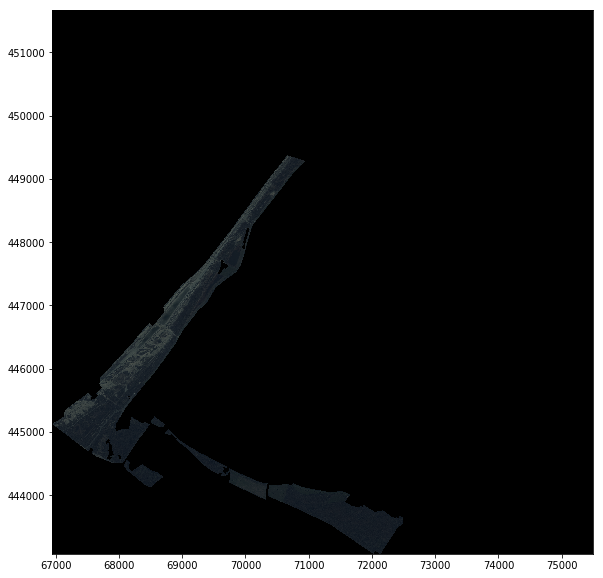

finished cropping E:/data/solleveld_kapittelduinen/20220315_112038_SV1-04_SV_RD_11bit_RGBI_50cm\20220315_112038_SV1-04_SV_RD_11bit_RGBI_50cm_HoekVanHolland.tif
Cropped file is found at: E:/data/solleveld_kapittelduinen/20220315_112038_SV1-04_SV_RD_11bit_RGBI_50cm_HoekVanHolland_natura2000_solleveld_kapittelduinen_cropped.tif
The NDVI picture is found at: 
NDVI numpy array is found at: 
Succesfully cropped .tif file and added NDVI
Ready
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20200523_110105_SV1-01
E:/data/solleveld_kapittelduinen/20200523_110105_SV1-01_SV_RD_11bit_RGBI_50cm*cropped.tif
File already cropped
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20191201_111733_SV1-04
E:/data/solleveld_kapittelduinen/20191201_111733_SV1-04_SV_RD_11bit_RGBI_50cm*cropped.tif
File already found skipping download
Extracting files
Extracted folder is: E:/data/solleveld_kapittelduinen/20191201_111733_SV1-04_SV_RD_11bit_RGBI_50cm
cropping file E:/dat

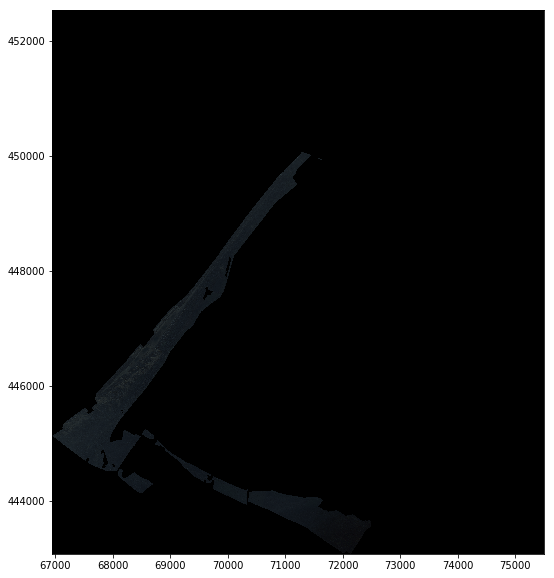

finished cropping E:/data/solleveld_kapittelduinen/20191201_111733_SV1-04_SV_RD_11bit_RGBI_50cm\20191201_111733_SV1-04_50cm_RD_11bit_RGBI_HoekVanHolland.tif
Cropped file is found at: E:/data/solleveld_kapittelduinen/20191201_111733_SV1-04_50cm_RD_11bit_RGBI_HoekVanHolland_natura2000_solleveld_kapittelduinen_cropped.tif
The NDVI picture is found at: 
NDVI numpy array is found at: 
Succesfully cropped .tif file and added NDVI
Ready
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20210610_111717_SV1-04
E:/data/solleveld_kapittelduinen/20210610_111717_SV1-04_SV_RD_11bit_RGBI_50cm*cropped.tif
File already cropped
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20200807_112235_SV1-03
E:/data/solleveld_kapittelduinen/20200807_112235_SV1-03_SV_RD_11bit_RGBI_50cm*cropped.tif
File already cropped
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20211009_110435_SV1-03
E:/data/solleveld_kapittelduinen/20211009_110435_SV1-03_SV_RD_11b

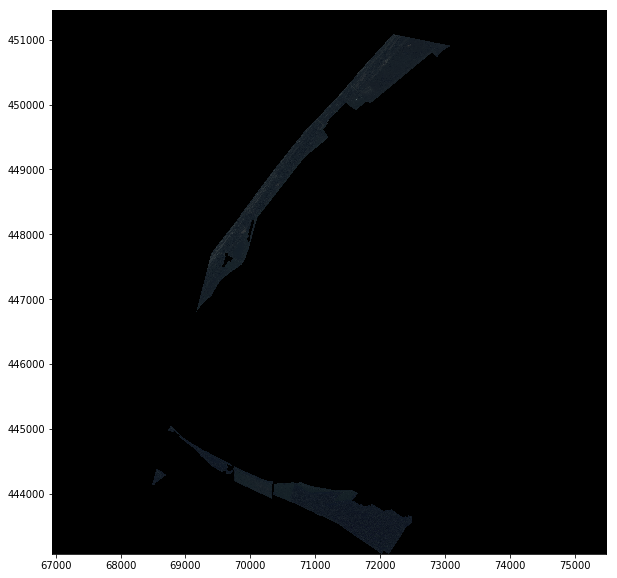

finished cropping E:/data/solleveld_kapittelduinen/20211009_110435_SV1-03_SV_RD_11bit_RGBI_50cm\20211009_110435_SV1-03_SV_RD_11bit_RGBI_50cm_Naaldwijk.tif
Cropped file is found at: E:/data/solleveld_kapittelduinen/20211009_110435_SV1-03_SV_RD_11bit_RGBI_50cm_Naaldwijk_natura2000_solleveld_kapittelduinen_cropped.tif
The NDVI picture is found at: 
NDVI numpy array is found at: 
Succesfully cropped .tif file and added NDVI
Ready
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20200326_112340_SV1-04
E:/data/solleveld_kapittelduinen/20200326_112340_SV1-04_SV_RD_11bit_RGBI_50cm*cropped.tif
File already cropped
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20190918_114102_SV1-02
E:/data/solleveld_kapittelduinen/20190918_114102_SV1-02_SV_RD_11bit_RGBI_50cm*cropped.tif
File already found skipping download
Extracting files
Extracted folder is: E:/data/solleveld_kapittelduinen/20190918_114102_SV1-02_SV_RD_11bit_RGBI_50cm
Error in downloading and/or cr

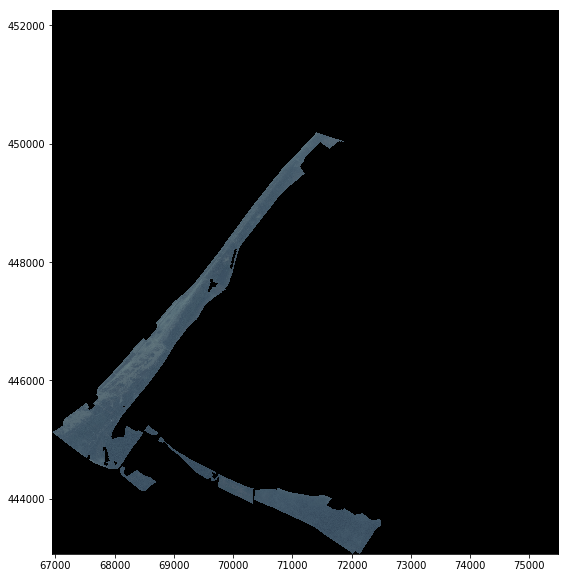

finished cropping E:/data/solleveld_kapittelduinen/20200603_112515_SV1-03_SV_RD_11bit_RGBI_50cm\20200603_112515_SV1-03_SV_RD_11bit_RGBI_50cm_HoekVanHolland.tif
Cropped file is found at: E:/data/solleveld_kapittelduinen/20200603_112515_SV1-03_SV_RD_11bit_RGBI_50cm_HoekVanHolland_natura2000_solleveld_kapittelduinen_cropped.tif
The NDVI picture is found at: 
NDVI numpy array is found at: 
Succesfully cropped .tif file and added NDVI
Ready
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20190514_110141_SV1-03
E:/data/solleveld_kapittelduinen/20190514_110141_SV1-03_SV_RD_11bit_RGBI_50cm*cropped.tif
File already found skipping download
Extracting files
Extracted folder is: E:/data/solleveld_kapittelduinen/20190514_110141_SV1-03_SV_RD_11bit_RGBI_50cm
cropping file E:/data/solleveld_kapittelduinen/20190514_110141_SV1-03_SV_RD_11bit_RGBI_50cm\20190514_110141_SV1-03_50cm_RD_11bit_RGBI_HoekVanHolland.tif
raster path opened
convert to RD
Plotting data for:E:/data/solleveld_ka

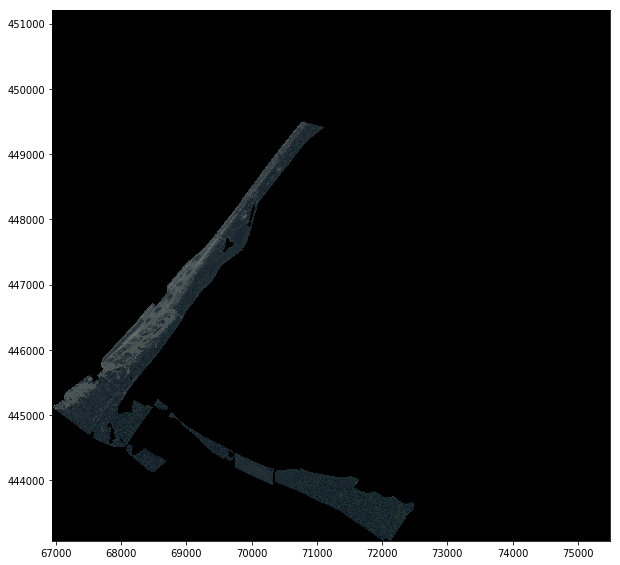

finished cropping E:/data/solleveld_kapittelduinen/20190514_110141_SV1-03_SV_RD_11bit_RGBI_50cm\20190514_110141_SV1-03_50cm_RD_11bit_RGBI_HoekVanHolland.tif
Cropped file is found at: E:/data/solleveld_kapittelduinen/20190514_110141_SV1-03_50cm_RD_11bit_RGBI_HoekVanHolland_natura2000_solleveld_kapittelduinen_cropped.tif
The NDVI picture is found at: 
NDVI numpy array is found at: 
Succesfully cropped .tif file and added NDVI
Ready
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20200424_112313_SV1-04
E:/data/solleveld_kapittelduinen/20200424_112313_SV1-04_SV_RD_11bit_RGBI_50cm*cropped.tif
File already cropped
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20190302_105832_SV1-01
E:/data/solleveld_kapittelduinen/20190302_105832_SV1-01_SV_RD_11bit_RGBI_50cm*cropped.tif
File already found skipping download
Extracting files
Extracted folder is: E:/data/solleveld_kapittelduinen/20190302_105832_SV1-01_SV_RD_11bit_RGBI_50cm
Error in downloading and/o

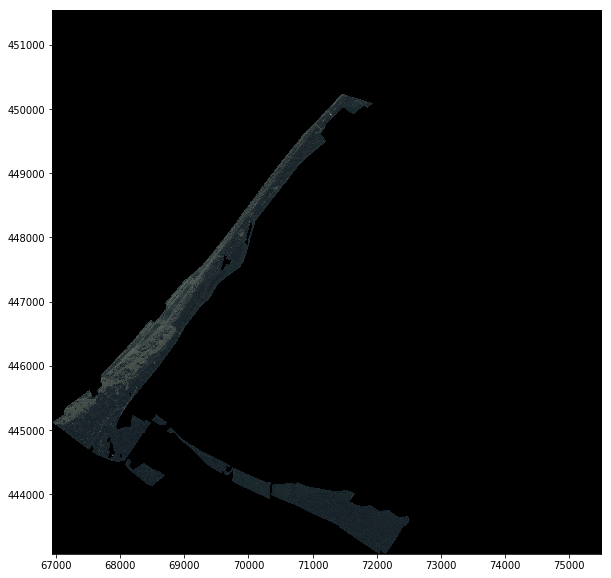

finished cropping E:/data/solleveld_kapittelduinen/20190401_111725_SV1-04_SV_RD_11bit_RGBI_50cm\20190401_111725_SV1-04_50cm_RD_11bit_RGBI_HoekVanHolland.tif
Cropped file is found at: E:/data/solleveld_kapittelduinen/20190401_111725_SV1-04_50cm_RD_11bit_RGBI_HoekVanHolland_natura2000_solleveld_kapittelduinen_cropped.tif
The NDVI picture is found at: 
NDVI numpy array is found at: 
Succesfully cropped .tif file and added NDVI
Ready
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20210422_112446_SV1-04
E:/data/solleveld_kapittelduinen/20210422_112446_SV1-04_SV_RD_11bit_RGBI_50cm*cropped.tif
File already found skipping download
Extracting files
Extracted folder is: E:/data/solleveld_kapittelduinen/20210422_112446_SV1-04_SV_RD_11bit_RGBI_50cm
cropping file E:/data/solleveld_kapittelduinen/20210422_112446_SV1-04_SV_RD_11bit_RGBI_50cm\20210422_112446_SV1-04_SV_RD_11bit_RGBI_50cm_HoekVanHolland.tif
raster path opened
convert to RD
Plotting data for:E:/data/solleveld_kapit

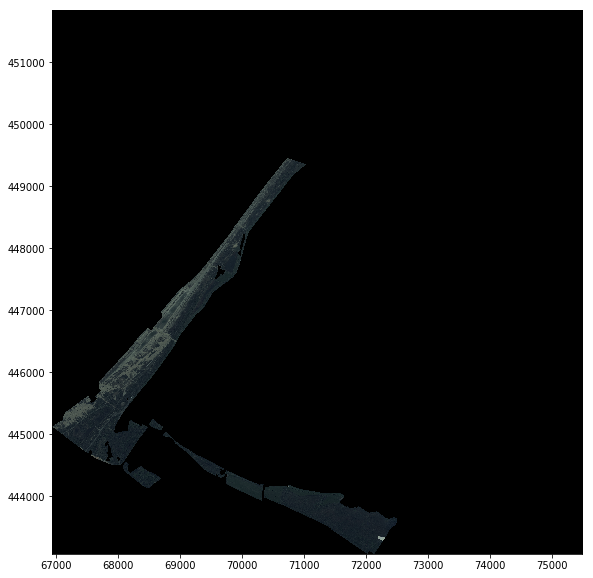

finished cropping E:/data/solleveld_kapittelduinen/20210422_112446_SV1-04_SV_RD_11bit_RGBI_50cm\20210422_112446_SV1-04_SV_RD_11bit_RGBI_50cm_HoekVanHolland.tif
Cropped file is found at: E:/data/solleveld_kapittelduinen/20210422_112446_SV1-04_SV_RD_11bit_RGBI_50cm_HoekVanHolland_natura2000_solleveld_kapittelduinen_cropped.tif
The NDVI picture is found at: 
NDVI numpy array is found at: 
Succesfully cropped .tif file and added NDVI
Ready
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20190721_112307_SV1-04
E:/data/solleveld_kapittelduinen/20190721_112307_SV1-04_SV_RD_11bit_RGBI_50cm*cropped.tif
File already found skipping download
Extracting files
Extracted folder is: E:/data/solleveld_kapittelduinen/20190721_112307_SV1-04_SV_RD_11bit_RGBI_50cm
cropping file E:/data/solleveld_kapittelduinen/20190721_112307_SV1-04_SV_RD_11bit_RGBI_50cm\20190721_112307_SV1-04_50cm_RD_11bit_RGBI_Naaldwijk.tif
raster path opened
convert to RD
Plotting data for:E:/data/solleveld_kapitte

MemoryError: Unable to allocate 9.14 GiB for an array with shape (17926, 17103, 4) and data type float64

<Figure size 720x720 with 1 Axes>

finished cropping E:/data/solleveld_kapittelduinen/20190721_112307_SV1-04_SV_RD_11bit_RGBI_50cm\20190721_112307_SV1-04_50cm_RD_11bit_RGBI_Naaldwijk.tif
Cropped file is found at: E:/data/solleveld_kapittelduinen/20190721_112307_SV1-04_50cm_RD_11bit_RGBI_Naaldwijk_natura2000_solleveld_kapittelduinen_cropped.tif
The NDVI picture is found at: 
NDVI numpy array is found at: 
Succesfully cropped .tif file and added NDVI
Failed to delete extracted folder: [WinError 32] The process cannot access the file because it is being used by another process: 'E:/data/solleveld_kapittelduinen/20190721_112307_SV1-04_SV_RD_11bit_RGBI_50cm\\20190721_112307_SV1-04_50cm_RD_11bit_RGBI_Naaldwijk_natura2000_solleveld_kapittelduinen_cropped.tif'
Ready
https://api.satellietdataportaal.nl/v1/download/SV_RD_11bit_RGBI_50cm/20220515_113350_SV1-02
E:/data/solleveld_kapittelduinen/20220515_113350_SV1-02_SV_RD_11bit_RGBI_50cm*cropped.tif
File already found skipping download
Extracting files
Extracted folder is: E:/data/

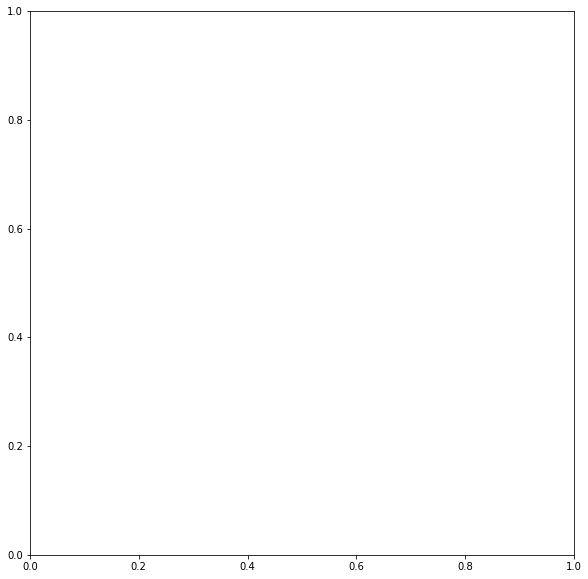

In [4]:
# loop through and download all the 50cm resolution RGBI SuperView images
nr_links=0
for link in links:
    if 'SV' in link and '50cm' in link and 'RGBI' in link: #and '2022' in link
        print(link)
        nr_links+= 1
        try:
            georegion.execute_link(link,auto_skip_done_cropped_files = True)
        except Exception as e:
            print(e)
print(nr_links)

In [ ]:
# loop through and download all the 200cm Trisat images
for link in links:
    if 'Tri' in link and "80cm" in link and "8bit" in link:
        try:
            georegion.execute_link(link)
        except Exception as e:
            print(e)

# Normalize LandSat image

### Multi date relative normalisation.

In [ ]:
# Imports the normalisation library.
from satellite_images_nso.__normalisation import normalisation

# Path to a Superview satellite image.
path = "20190401_111723_SV1-04_200cm_RD_11bit_RGBI_DenHaag_solleveld_sweco_cropped.tif"

normalisation.multidate_normalisation_75th_percentile(path)

### Black spot normalisation.

In [ ]:
path = "data_satellite/20210302_111341_SV1-03_SV_RD_11bit_RGBI_200cm_Brouwersdam_Grevelingen_21_cropped.tif"

In [ ]:
# The first argument here is the path to satellite image and the second is the name of the satellite image to get coefficients for, this can be filled in partially.
normalisation.multi_date_dark_spot_normalisation(path,"20210302")

# Other functionalities

In [ ]:
# The sat_manipulator gives other handy transmations on satellite data.
import satellite_images_nso.api.sat_manipulator as sat_manipulator

# This function reads a .tif file, which is a format the satellite data is stored in,  and converts it to a pixel based geopandas dataframe.
# For machine learning purposes.
path_to_vector = "path/to/folder/*.tif"
geo_df_pixel = sat_manipulator.tranform_vector_to_pixel_gpdf(path_to_vector)